## PHYS 105A:  Introduction to Scientific Computing

# Introduction to Quantum Computing

Chi-kwan Chan

## Before We Start...

* Please fill in Student Course Survey (SCS) to provide feedback to this course.

* Coincidence: there are two quantum computing related talks in the physics department this week:

  * Friday, April 22<br>
    Spring 2022 Physics Physics Grad Talk <br>
    Title: Continuous-variable quantum repeaters based on bosonic error-correction and teleportation: architecture and applications<br>
    Speaker: Bo-Han Wu, University of Arizona<br>
    Time/Location: 2:00-2:30pm PAS 218<br>
    Zoom Link:  https://arizona.zoom.us/s/85694396779
 
  * Friday, April 22<br>
    Spring 2022 Physics Colloquium<br>
    Title: Encoded Silicon Qubits: A High-Performance & Scalable Platform for Practical Quantum Computing<br>
    Speaker: Dr. Thaddeus Ladd, HRL Laboratories, LLC<br>
    Time/Location: 3:00pm PAS 201 *refreshments served in PAS 218 from 2:45-3:00*<br>
    Zoom Link: https://arizona.zoom.us/j/82510238768

## Feynman's Vision

The Nobel laureate Richard Feynman spoke in a conference "Simulating physics with computers" in 1981, where he noted that quantum systems are difficult to simulate with digital computers.  He proposed to use quantum systems themselves to simulate quantum systems.  This was considered the "beginning" of the new field "quantum computing", although [other work has been carried out before Feynman](https://en.wikipedia.org/wiki/Timeline_of_quantum_computing_and_communication).

Here are a few quotes from Feynman's talk:

> The rule of simulation that I would like to have is that the number of computer elements required to simulate a large physical system is only to be proportional to the space-time volume of the physical system.

The above statement was addressing the observation that:

> ... the full description of quantum mechanics for a large system with $R$ particles is given by a function which we call the amplitude to find the particles at $x_1$, $x_2$, .... $x_R$, and therefore because it has too many variables, *it cannot be simulated with a normal computer.*

And then Feynman suggested:

> Can you do it with a new kind of computer&mdash;a quantum computer? Now it
turns out, as far as I can tell, that you can simulate this with a quantum system, with quantum computer elements. *It’s not a Turing machine, but a machine of a different kind.*

## The Core Problem

What's the core problem that Feynman described?  Let's translate the above quotes into things that we've learned in this class.  Specifically, because computation is about controlling complexity, let's use think about the problem in terms of complexity.

* Instead of the double pendulum problem we solved in the last assignment, let's consider a chain of $R$ pendulums.

  * We can use $R$ variables to describe the angles of each pendulum, and $R$ variables to describe the (canonical) momenta of each pendulum.  This suggests the "spatial complexity" or "memory requirement" of this problem is $\propto 2R \propto R$, or in the "big O" notation, $\mathcal{O}(R)$.

  * Because each pendulum is at most connected to two other pendulums, it is possible to write down the equation of motions with $\sim 3R$ terms.  This suggests the "time complexity" or "computation requirement" of this problem is $\propto R$ or $\mathcal{O}(R)$.

  * Even for more complicated problems like the direct $n$-body problem (i.e., $R$ gravity body in our notation), the interaction happens per particle pair, the number of terms in the gravity force is $\propto R^2$ or $\mathcal{O}(R^2)$.  With smarter algorithms, it is possible to approximate the problem with $\mathcal{O}(R\log R)$.
  
  * Ultimately, this means, adding a particle to our problem will only increease the "spatial-temporal complexity", or "memory and computation requirements", slowly.

* Now, let's consider the quantum system that Feynman had in mind.

  * Feynman stated in quantum mechanics for man ($R$) particles, the wave function is $\psi(x_1, x_2, ..., x_R)$.

  * Suppose we only care the particle system in a finite box with finite energy levels, using old school computation physics method and digital computers, we can approximate the wave function with an $R$-dimension array with shape `[N, N, ..., N]`, which $N$ is proportional to the number of "modes", or "quantum states", "energy levels", for each particle.
  
  * The sptial complexity of the problem is $N^R$, which is exponential in $R$!!!  Every time we want to add a particle to our system, we do not just add one or $R$ memory locations, instead, we need to add $N^R \times (N-1)$ memory locations.
  
  * We simply do not know how to have enough memory in a digital computer to solve a quantum problem!!!  And who knows what time complexity we need to solve this problem.
  
* In some sense, Feynman suggested that, if we can storage information using quantum mechanic properties, then we can at least solve the spatial complexity problem.  We will leave the time complexity (algorithm) problem for other smart people to work on.

* In this quick introduction, we will learn how to work with quantum states, i.e., the spatial complexity part.  We will not touch the actual quantum algorithms, i.e., the time complexity part.

## Selected [Milestones](https://en.wikipedia.org/wiki/Timeline_of_quantum_computing_and_communication)  in Quantum Computing

* 1968: Stephen Wiesner invents conjugate coding.

* 1980: Paul Benioff describes the first quantum mechanical model of a computer. 

* 1981: At the First Conference on the Physics of Computation, held at MIT in May, Paul Benioff and Richard Feynman give talks on quantum computing.

* 1988: Yoshihisa Yamamoto and K. Igeta propose the first physical realization of a quantum computer, including Feynman's CNOT gate.

* 1995: The first United States Department of Defense workshop on quantum computing and quantum cryptography is organized by United States Army physicists Charles M. Bowden, Jonathan P. Dowling, and Henry O. Everitt; it takes place in February at the University of Arizona in Tucson

* 1997: David Cory, Amr Fahmy and Timothy Havel, and at the same time Neil Gershenfeld and Isaac L. Chuang at MIT publish the first papers realizing gates for quantum computers

* 1998: First working 3-qubit NMR computer

* 2000: First working 7-qubit NMR computer demonstrated at the Los Alamos National Laboratory.

* 2007: D-Wave Systems demonstrates use of a 28-qubit quantum annealing computer.

* 2017: D-Wave Systems announces general commercial availability of the D-Wave 2000Q quantum annealer, which it claims has 2000 qubits.

* 2017: IBM unveils 17-qubit quantum computer—and a better way of benchmarking it.

* 2018: Google announces the creation of a 72-qubit quantum chip, called "Bristlecone", achieving a new record.

* 2018: Intel confirms development of a 49-qubit superconducting test chip, called "Tangle Lake".

* 2019: Google claims to have reached quantum supremacy.

* 2019: IBM reveals its biggest quantum computer yet, consisting of 53 qubits.
 
* 2021: IBM claims that it has created a new 127 quantum bit processor, 'IBM Eagle'.

* 2022: Europe's first quantum annealer with more than 5,000 qubits is launched in Jülich, Germany

## Proposed Applications

Based on this introduction, quantum computers can work with *much more* information than a digital computer can.  Therefore, in addition the original visioin of Feynman, we can "abuse" quantum properties and apply quantum computers to other problems.  Here is a selected list of applications:

* Chemical and biological engineering.  E.g., drug development, better battery.

* Cybersecurity.

* Artificial intelligence.

* Complex system model.  E.g., weather forecasting and climate change, financial modeling

Note also that, quantum computers are not going to replace digital computers.  Instead, they will be used as "accelerators" such as GPUs and TPUs to accelerate specific parts of computation.

## Roman Numbers, Arabic Numbers, Binaries, and Qubits

## Procedure Programming, Data Flows, and Quantum Circuits

## Quantum Computing Tools

* [IBM Qiskit](https://qiskit.org/)

* [Google Cirq](https://quantumai.google/cirq)

* [ETH ProjectQ](https://projectq.ch/)

* ...

## Hands-on Quantum Computing with `Qiskit`

We will use `Qiskit` to write some quantum computing codes.

This hands-on exercise is based on [Introduction to Qiskit](https://qiskit.org/documentation/intro_tutorial1.html).

In [ ]:
# Step 0.  Install `Qiskit`

# To install `Qiskit`, run
#
#     pip3 install 'qiskit[visualization]'
#
# in your terminal.
#
# Alternatively, you may run

! pip3 install 'qiskit[visualization]'

# with the exclamation mark in a Jupyter notebook cell to "shell out" to your terminal.

In [1]:
# Step 1. Import Packages

# For this simple hands-on, we just need to import the follow packages.

# A class that holds all your quantum operations.
# It can be thought as the instructions of the quantum system. 
from qiskit import QuantumCircuit

# Aer high performance circuit simulator
from qiskit.providers.aer import QasmSimulator

# Creates histograms for visualization 
from qiskit.visualization import plot_histogram

In [2]:
# Step 2. Initialize Quantum Circuit

# The QuantumCircuit class can be instantized with multiple forms:
#
#     https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html
#
# When passed with 2 integers, they represent the number of qubits and classical bits.
# E.g., `QuantumCircuit(4, 3)` returns a QuantumCircuit with 4 qubits and 3 classical bits.
#
# Here, we create a QuantumCircuit with 2 qubits and classical bits.

circuit = QuantumCircuit(2, 2)

In [3]:
# Step 3. Add Gates

# In order to perform quantum operations, we need to add quantum gates to our newly created circuit.
# Unfortunately we didn't have time to go over the meaning of these quantum gates. But for our purpose,
# it is fine that we see these as "operations" or "transformations" of the quantum states.

# We first put a Hadamard gate `H` on qubit 0, which puts it into a superposition state.
circuit.h(0)

# We then put a controlled-Not operation (`CNOT`) on control qubit 0 and target qubit 1,
# putting the qubits in an entangled state.
circuit.cx(0, 1)

# Finally, we measure the quantum states in the quantum circuit
# and put the results in the classical bits.
circuit.measure([0,1], [0,1])

In [4]:
# Step 4. Visualize the Circuit

# When the quantum circuit gets complicated, it is much easier to look at a graphical represntation
# instead of the code above.
# `Qiskit` has built-in visualization tools for this.
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

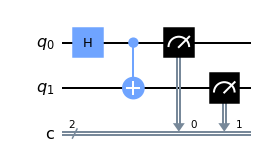

In [5]:
# In this circuit, the qubits are ordered with qubit zero at the top and qubit one at the bottom.
# The circuit is read left-to-right, meaning that gates which are applied earlier in the circuit
# show up farther to the left.

# The default backend for QuantumCircuit.draw() or qiskit.visualization.circuit_drawer() is the text backend.
# However, given that we have `matplotlib` installed, we may use `matplotlib` to create a slightly better
# quantum circuit diagram

circuit.draw('mpl')

## Additional Resources

* Online materials and books: https://qiskit.org/learn

* IBM Quantum Challenge: https://challenges.quantum-computing.ibm.com/ (I attended one in 2021)

* Talks on quantum computing, e.g.,

  * Friday, April 22<br>
    Spring 2022 Physics Physics Grad Talk <br>
    Title: Continuous-variable quantum repeaters based on bosonic error-correction and teleportation: architecture and applications<br>
    Speaker: Bo-Han Wu, University of Arizona<br>
    Time/Location: 2:00-2:30pm PAS 218<br>
    Zoom Link:  https://arizona.zoom.us/s/85694396779
 
  * Friday, April 22<br>
    Spring 2022 Physics Colloquium<br>
    Title: Encoded Silicon Qubits: A High-Performance & Scalable Platform for Practical Quantum Computing<br>
    Speaker: Dr. Thaddeus Ladd, HRL Laboratories, LLC<br>
    Time/Location: 3:00pm PAS 201 *refreshments served in PAS 218 from 2:45-3:00*<br>
    Zoom Link: https://arizona.zoom.us/j/82510238768